<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/Filtros_e_DFT_(2a_parte).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy import signal, fftpack, io
import matplotlib.pyplot as plt

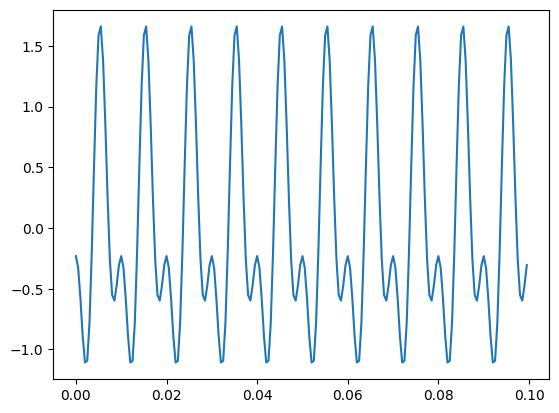

In [17]:
Fs = 2000 # taxa de amostragem
f0 = 100 # frequência da senoide
fase_ini = 0 # ângulo de fase inicial
ampl = 1 # amplitude da senoide
durt = 0.1 # duração do sinal
Ts = 1/Fs # Periodo de amostragem
num_passos = np.round(durt*Fs).astype(int) # número de passos
n = np.arange(0,num_passos,1) # índices amostrais
x_sine_1 =  ampl*np.sin(2*np.pi * f0 * n*Ts - 2)
x_sine_2 =  0.707*np.sin(2*np.pi * 2*f0 * n*Ts - 5) # Dobro da frequencia de x_sine_1
t = n*Ts # escala de tempo do sinal
composicao = x_sine_1+x_sine_2
plt.plot(t, x_sine_1+x_sine_2)

# Efeitos da resposta de fase não linear dos filtros IIR sobre a temporização de eventos


Criando um filtro passa-baixas com fase não linear:

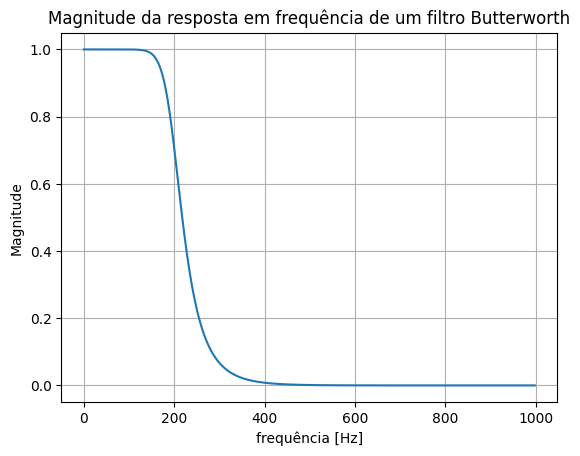

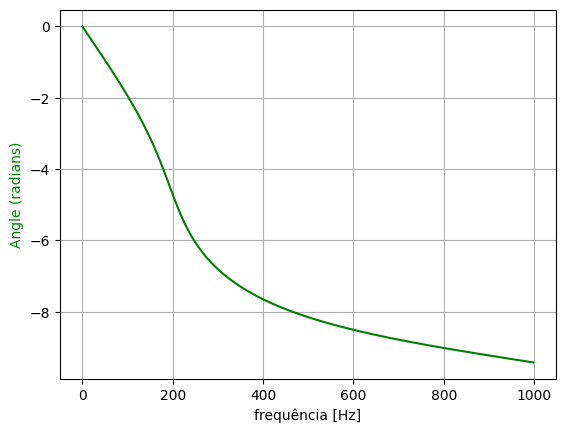

<ipython-input-24-ab07572c3204>:22: UserWarning: The filter's denominator is extremely small at frequencies [3.135],             around which a singularity may be present
  w, gd = signal.group_delay((B, A))


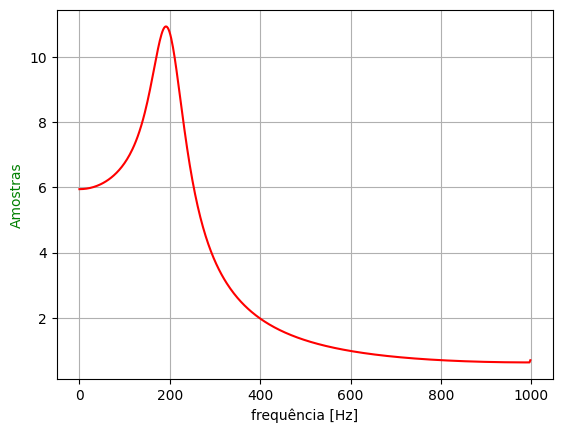

In [ ]:
freq_Nyq = Fs/2
f_c = 200/freq_Nyq
[B,A] = signal.butter(6,f_c, 'lowpass') # frequência de corte em 200Hz

w, H = signal.freqz(B, A)
f= freq_Nyq*(w/np.pi)
plt.plot(f, abs(H))

plt.title('Magnitude da resposta em frequência de um filtro Butterworth')
plt.xlabel('frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

angles = np.unwrap(np.angle(H))
plt.plot(f, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('frequência [Hz]')
plt.grid()
plt.show()

w, gd = signal.group_delay((B, A))
plt.plot(f, gd, 'r')
plt.ylabel('Amostras', color='g')
plt.xlabel('frequência [Hz]')
plt.grid()
plt.show()

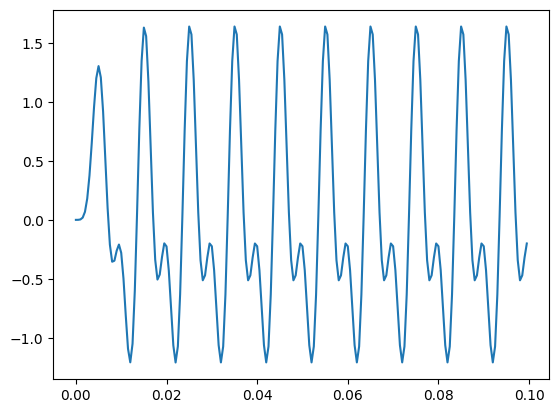

In [ ]:
composicao_filtrada = signal.lfilter(B, A, composicao)
plt.plot(t,composicao_filtrada)

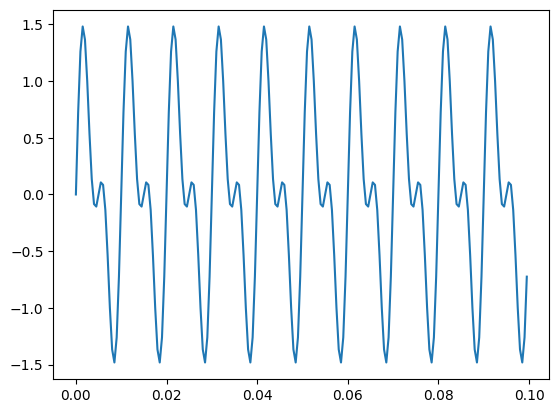

In [ ]:
comparacao = x_sine_1+ x_sine_2/np.sqrt(2)
plt.plot(t,comparacao)

Filtragem com fase zero:

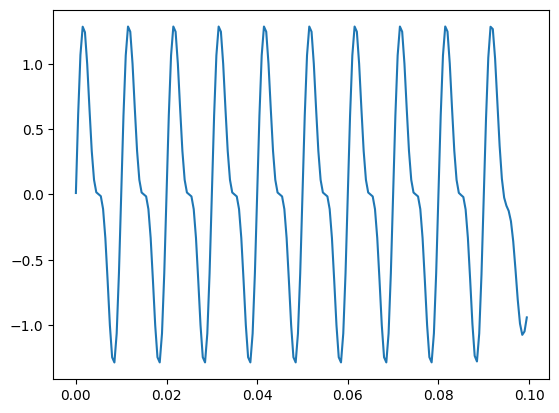

In [ ]:
composicao_filtrada_fase_zero = signal.filtfilt(B, A, composicao)
plt.plot(t,composicao_filtrada_fase_zero)

In [19]:
from google.colab import files
uploaded = files.upload()

Saving 100m (0).mat to 100m (0).mat


Carregando sinal de eletrocardiograma com extensão .mat (arquivo de dados do matlab):

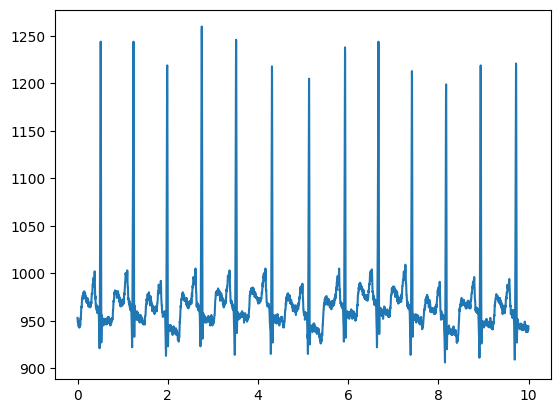

In [21]:
ECG_data = io.loadmat('100m (0).mat', struct_as_record=True) # Carrega os dados como um struct
ECG = ECG_data['val']
Fs = 360 # taxa de amostragem
Ts = 1/Fs # Periodo de amostragem
n = np.arange(0,len(ECG[0]),1) # índices amostrais
t = n*Ts # escala de tempo do sinal
plt.plot(t,ECG[0])

Exemplo de sinal senoidal:

In [ ]:
Fs = 2000 # taxa de amostragem
f0 = 100 # frequência da senoide
fase_ini = 0 # ângulo de fase inicial
ampl = 1 # amplitude da senoide
durt = 0.1 # duração do sinal
Ts = 1/Fs # Periodo de amostragem
num_passos = np.round(durt*Fs).astype(int) # número de passos
n = np.arange(0,num_passos,1) # índices amostrais
x_sine =  ampl*np.sin(2*np.pi * f0 * n*Ts + fase_ini)
t = n*Ts # escala de tempo do sinal
plt.plot(t, x_sine)

NameError: ignored

Text(0.5, 1.0, 'Espectro de magnitude em frequência')

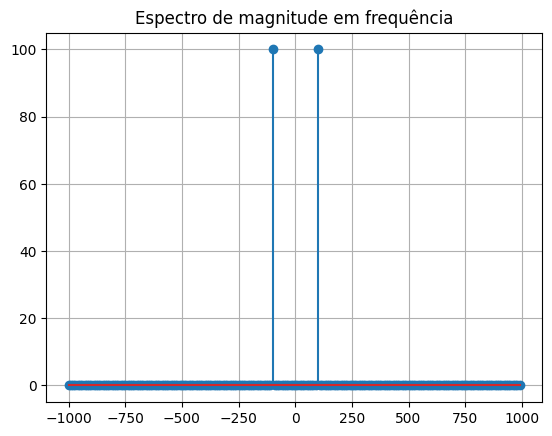

In [ ]:
# DFT através do scipy
N = len(x_sine)
DFT_sine = fftpack.fft(x_sine,N)
mag_espectro = np.abs(DFT_sine)
f = fftpack.fftfreq(N, 1 / Fs)
plt.stem(fftpack.fftshift(f),fftpack.fftshift(mag_espectro))
plt.grid()
plt.title('Espectro de magnitude em frequência')

Reconstrução através da IDFT:

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


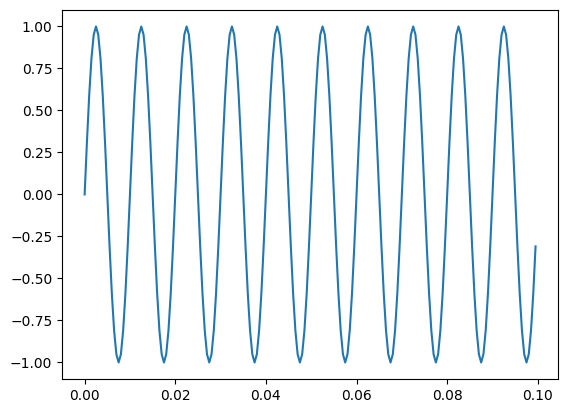

In [ ]:
x_sine_est = fftpack.ifft(DFT_sine)
plt.plot(t, x_sine_est)

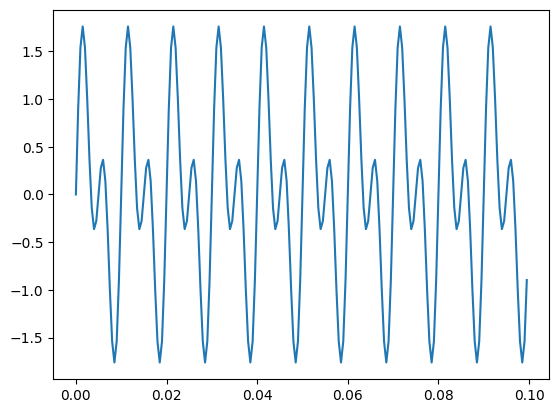

In [3]:
Fs = 2000 # taxa de amostragem
f0 = 100 # frequência da senoide
fase_ini = 0 # ângulo de fase inicial
ampl = 1 # amplitude da senoide
durt = 0.1 # duração do sinal
Ts = 1/Fs # Periodo de amostragem
num_passos = np.round(durt*Fs).astype(int) # número de passos
n = np.arange(0,num_passos,1) # índices amostrais
x_sine_1 =  ampl*np.sin(2*np.pi * f0 * n*Ts + fase_ini)
x_sine_2 =  ampl*np.sin(2*np.pi * 2*f0 * n*Ts + fase_ini) # Dobro da frequencia de x_sine_1
t = n*Ts # escala de tempo do sinal
composicao = x_sine_1+x_sine_2
plt.plot(t, x_sine_1+x_sine_2)